## Списки

Вам дан список. Поменяйте порядок следования элементов, начиная с середины до конца списка.

In [19]:
import numpy as np

arr = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mid = len(arr) // 2

arr[mid:] = arr[mid:][::-1]


print(arr)


[1, 2, 3, 4, 9, 8, 7, 6, 5]


Вам дан список. Поменяйте в нём местами блоки элементов: каждый чётный со второго по пятый с каждым нечётым со второго по пятый с конца.

In [33]:
arr = [1,2,3,4,5,6,7,8,9]
arr[1:4:2], arr[-1:-4:-2] = arr[-1:-4:-2], arr[1:4:2]

print(arr)

[1, 9, 3, 7, 5, 6, 4, 8, 2]


## Генераторы

Вам дан список. Создайте новый список, который возведёт в квадрат элементы исходного списка.

In [21]:

list = [1, 2, 3, 4, 5]

list = [x ** 2 for x in list]


print(list)

[1, 4, 9, 16, 25]


Вам дан список. Создайте новый список, который вычитает из каждого элемента списка пять.

In [22]:

list = [1, 2, 3, 4, 5]

list = [x - 5 for x in list]


print(list)

[-4, -3, -2, -1, 0]


## Встроенные функции

Вам дана строка. Выведите разницу между наибольшим и наименьшим ascii-кодом символа в строке.

In [23]:
string = 'abcdefg'
ascii = [ord(char) for char in string]
m = max(ascii)
minim = min(ascii)
print(m - minim)

6


Вам дана строка. Выведите отсортированную строку, приведённую к верхнему регистру.

In [24]:
string = 'gfedcba'
print(''.join(sorted(string)).upper())

ABCDEFG


## NumPy

Вам дан одномерный массив. На основе этого массива сгенерируйте двумерный массив, который группирует по 4 элемента в строку из исходного.

Размерность исходного массива кратна 4.

Например:

`A = [1,2,3,4,5]` - исходный массив

`B = [[1,2,3,4],[2,3,4,5]]` - полученный

In [32]:
A = np.array([1,2,3,4,5])
B = []
for i in range(len(A) % 4 + 1):
  B.append(A[i:4 + i])
print(np.array(B))

[[1 2 3 4]
 [2 3 4 5]]


Дан массив числе одномерный


Создайте двумерный массив, где строка это бинарное представление числа из исходного.

Например:
`A = [0, 1, 2]` - исходный массив

`B = [[0 0 0 0 0 0 0 0]
     [0 0 0 0 0 0 0 1]
     [0 0 0 0 0 0 1 0]]` - полученный

In [26]:
arr = np.array([1,2,3,4,5,6,7,8])
binary = []

for number in arr:
        binary.append([int(x) for x in np.binary_repr(number, width=8)])
print(np.array(binary))





[[0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 1]
 [0 0 0 0 0 1 1 0]
 [0 0 0 0 0 1 1 1]
 [0 0 0 0 1 0 0 0]]


## Pandas

https://www.kaggle.com/datasets/muhammetvarl/laptop-price

- Какие типы данных присутствуют в датасете?
- Есть ли в датасете пропущенные значения? Если да, то сколько и где?
- Очистите переменные: например `Ram` от Gb (сделав ее числовой), `ScreenResolution` создайте две колонки, например, ширина отдельно и длинна отдельно (тем самым сделав ее числовой), разделите колонку `Cpu` отдельно на тип процессора и отдельно на часототу, и так далее.
- Постройте heatmap для матрицы корреляции числовых переменных в датасете.
- Постройте pairplot для всех переменных.
- Постройте boxplot для всех переменных и выведете объекты которые являются выбросами (строки из датафрейма).
- Постройте гистраграмму переменной `Company`.

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('laptop_price.csv', encoding='latin-1')

print(df.dtypes)
print(df.dtypes.unique())
print(df.isnull().sum())
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
df['Width'] = df['ScreenResolution'].str.extract(r'(\d+)x\d+')[0].astype(int)
df['Height'] = df['ScreenResolution'].str.extract(r'\d+x(\d+)')[0].astype(int)
df[['Memory', 'MemoryType']] = df['Memory'].str.extract(r'(\d+GB)\s+(.*)')
df['Memory'] = df['Memory'].str.replace('GB', '').astype(float)


df[['CpuType', 'CpuFrequency']] = df['Cpu'].str.extract(r'([a-zA-Z0-9\s]+)\s+([\d+].[\d+]GHz)')
df['CpuFrequency'] = df['CpuFrequency'].str.replace('GHz', '').astype(float)
df.drop(columns=['Cpu'], inplace=True)
df.drop(columns=['ScreenResolution'], inplace=True)
print(df.head())





laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object
[dtype('int64') dtype('O') dtype('float64')]
laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64
   laptop_ID Company      Product   TypeName  Inches  Ram  Memory  \
0          1   Apple  MacBook Pro  Ultrabook    13.3    8   128.0   
1          2   Apple  Macbook Air  Ultrabook    13.3    8   128.0   
2          3      HP       250 G6   Notebook    15.6    8   256.0   
3 

In [42]:
df['ScreenResolution'].value_counts()

KeyError: 'ScreenResolution'

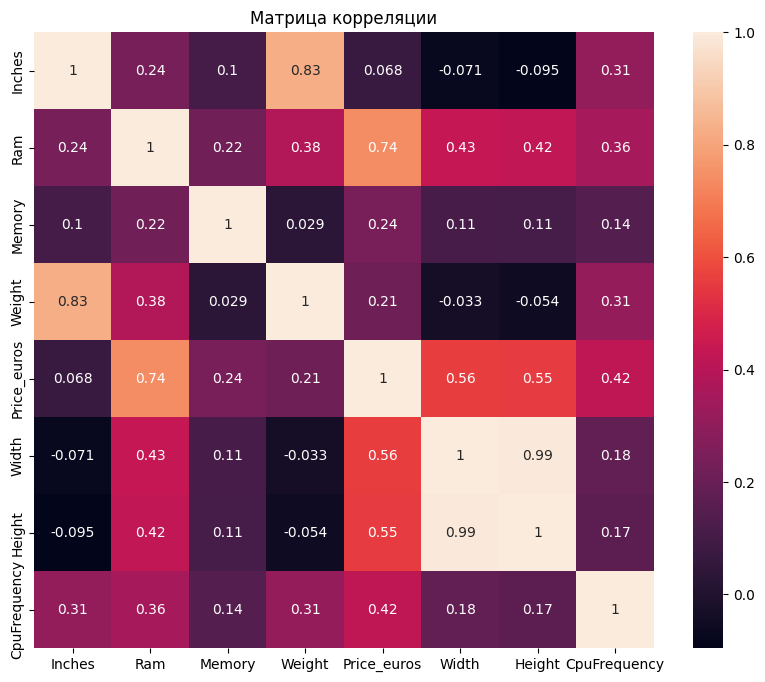

In [28]:
numeric_data = df.select_dtypes(include='number').drop(columns='laptop_ID')
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True)

plt.title('Матрица корреляции')
plt.show()

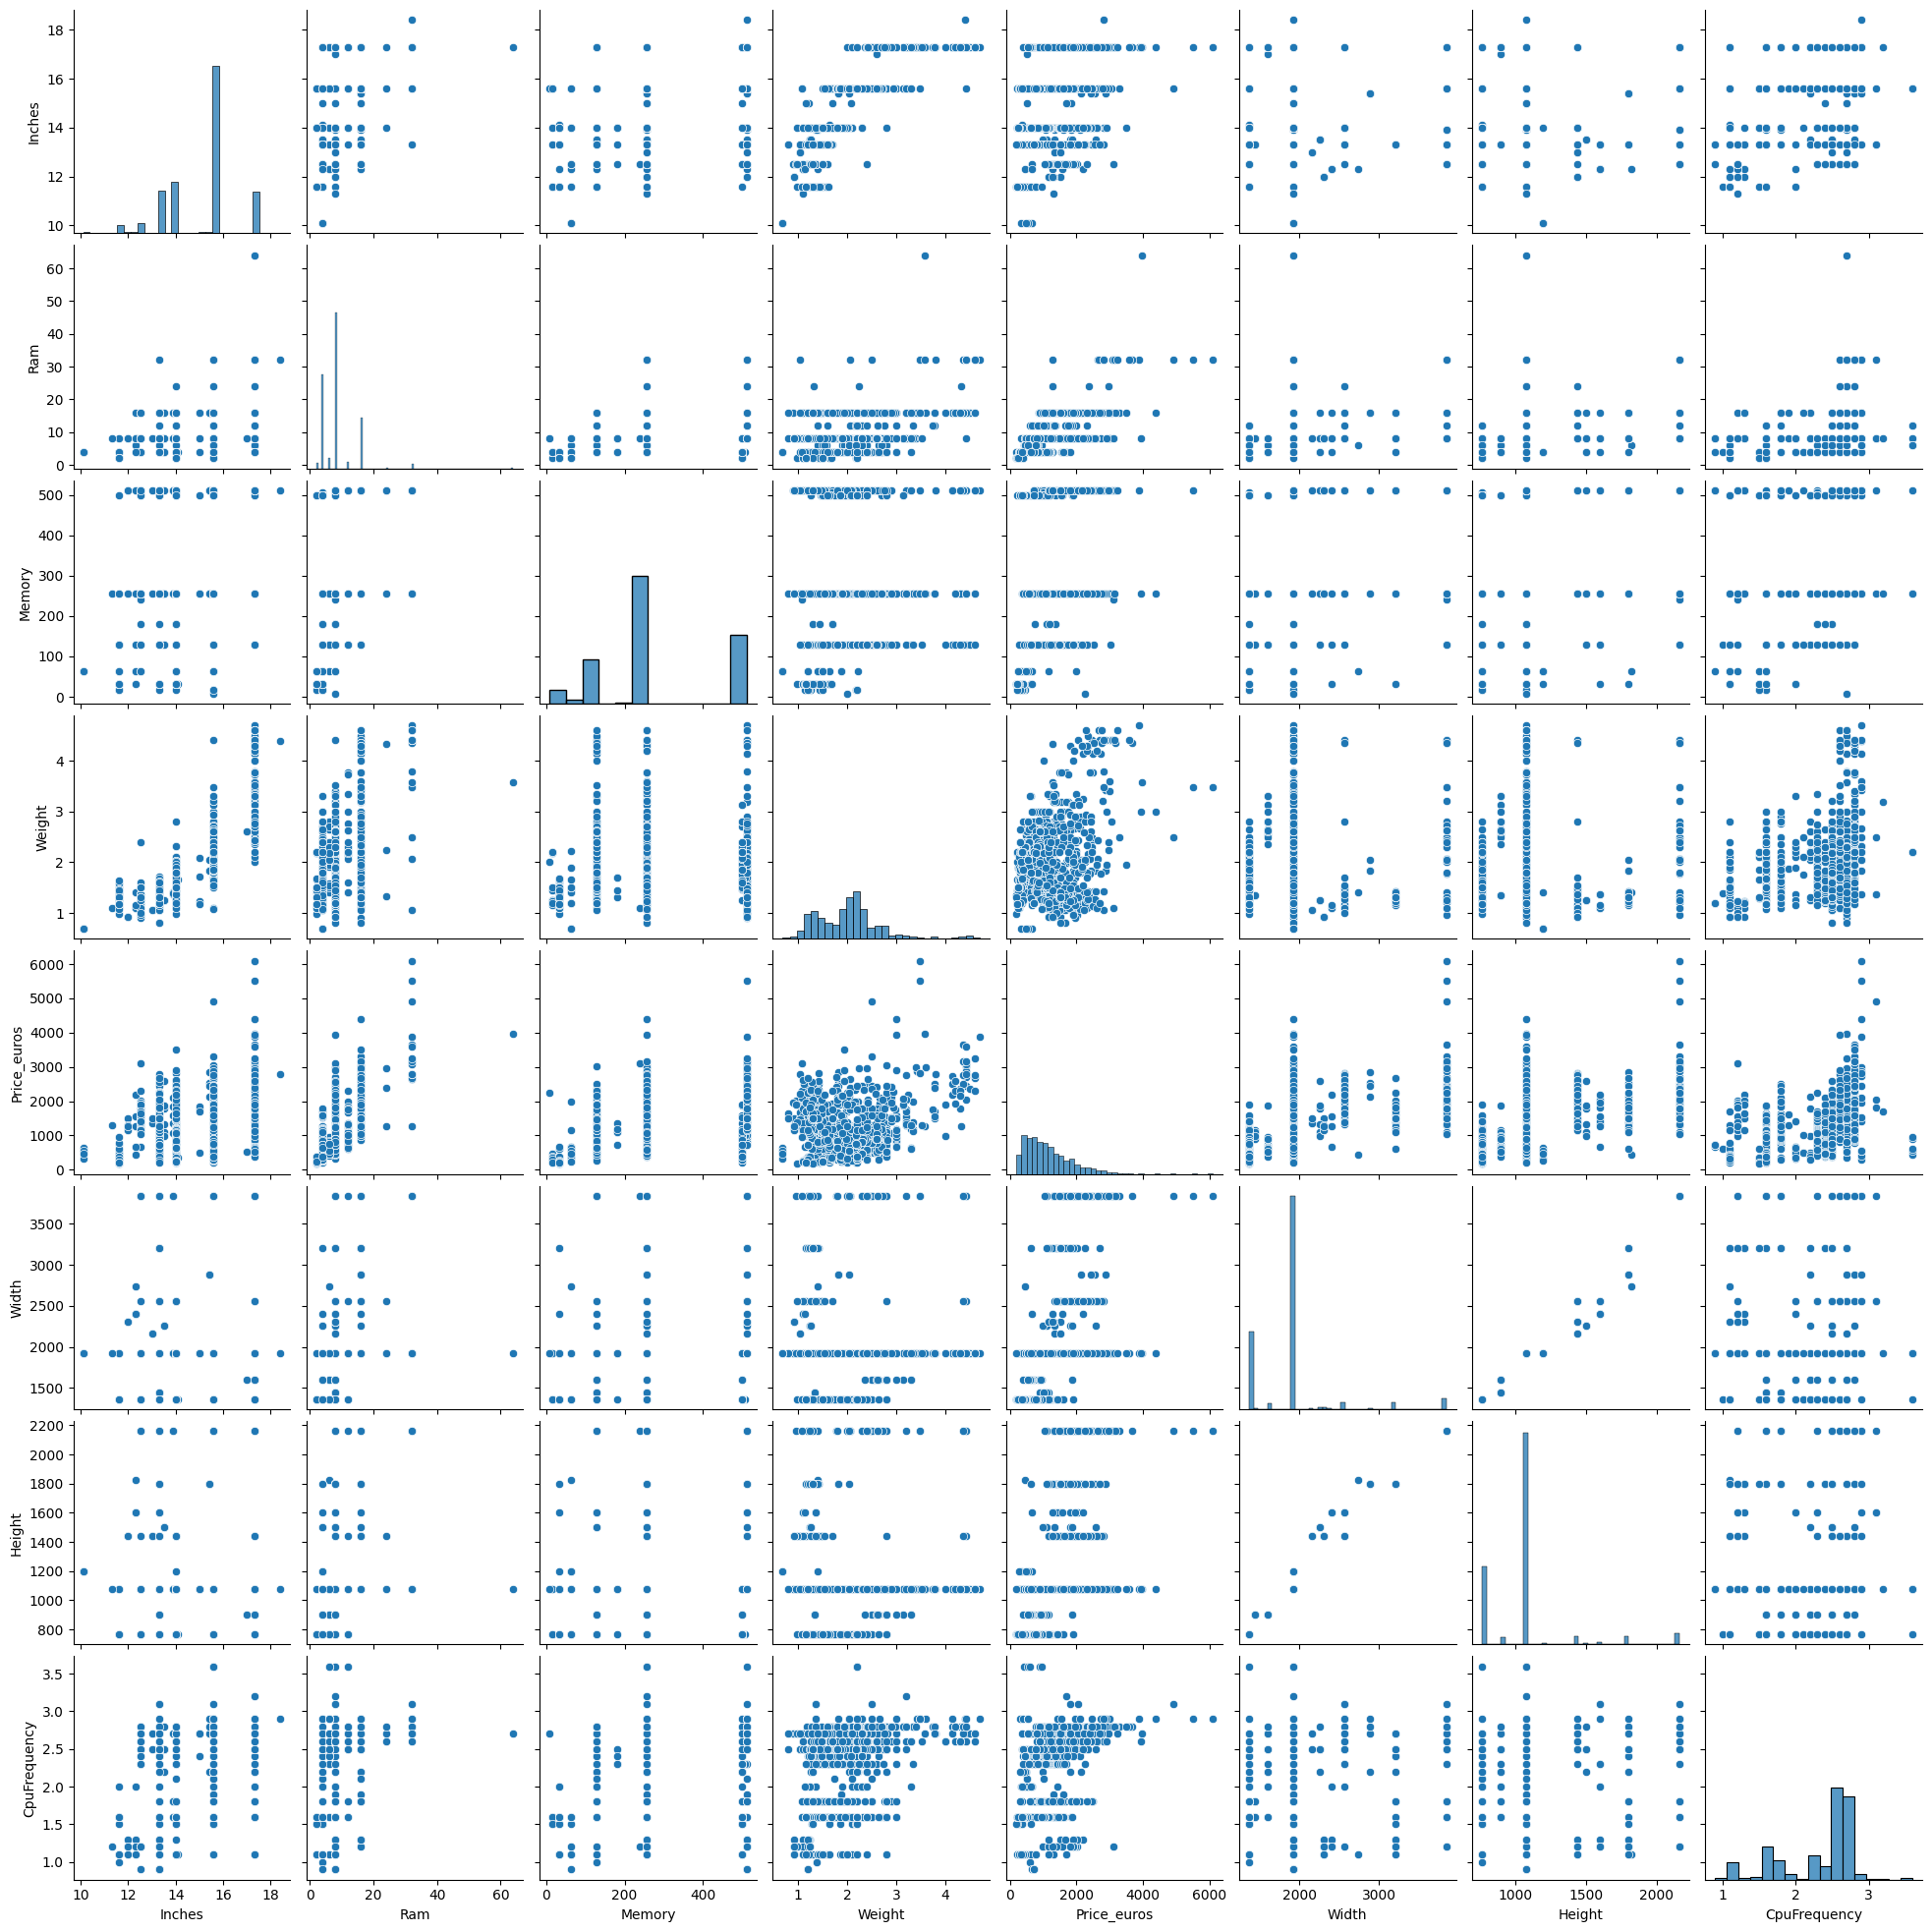

In [39]:
sns.pairplot(numeric_data)
plt.show()

20      11.6
29      17.3
32      17.3
37      17.3
44      17.3
        ... 
1243    17.3
1256    17.3
1268    11.6
1282    11.6
1296    11.6
Name: Inches, Length: 204, dtype: float64
3       16
6       16
8       16
12      16
17      16
        ..
1247    16
1256    16
1271    16
1285    16
1299    16
Name: Ram, Length: 246, dtype: int64
Series([], Name: Memory, dtype: float64)
32      2.71
37      2.80
44      2.77
47      3.20
49      2.80
        ... 
1216    3.30
1217    2.80
1233    2.70
1243    2.77
1256    4.00
Name: Weight, Length: 154, dtype: float64
3       2537.45
6       2139.97
12      2439.97
17      2858.00
58      2449.00
         ...   
1212    1948.99
1214    1949.00
1231    3499.00
1236    2198.19
1247    2325.00
Name: Price_euros, Length: 157, dtype: float64
0       2560
3       2880
4       2560
6       2880
12      2880
        ... 
1236    2560
1249    3200
1271    3200
1285    3200
1299    3200
Name: Width, Length: 122, dtype: int64
0       1600
3       1800


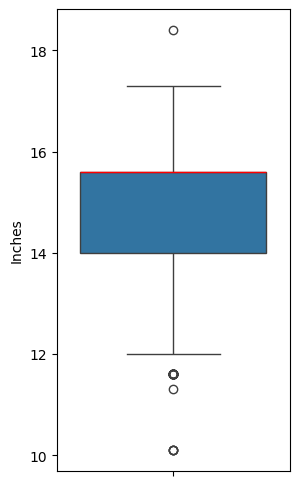

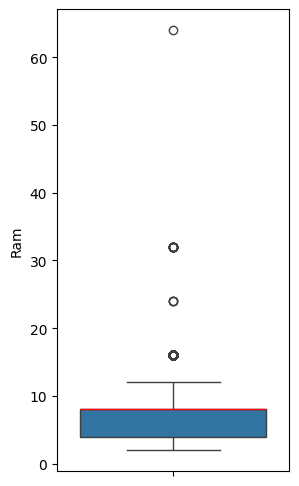

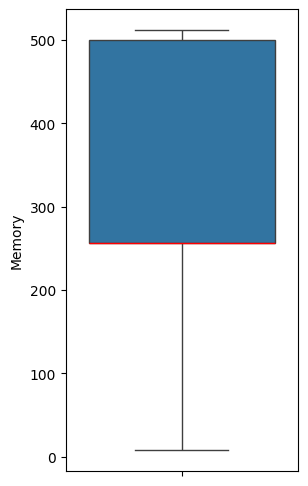

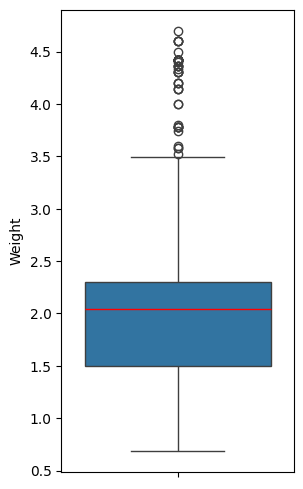

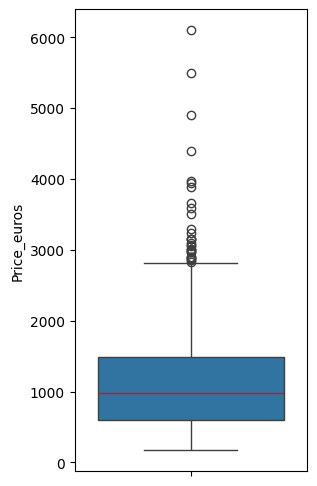

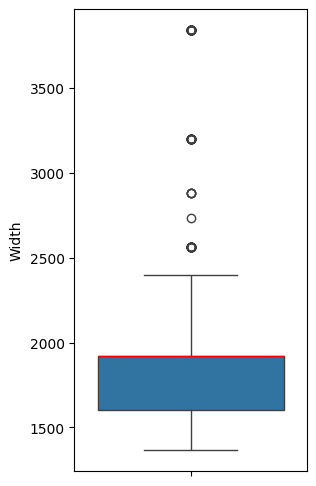

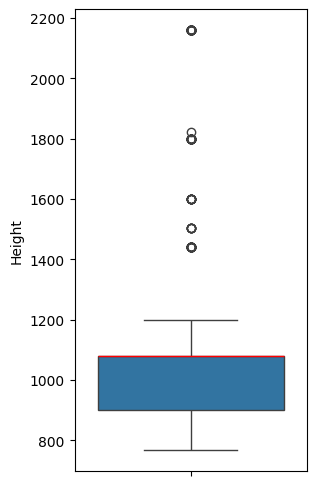

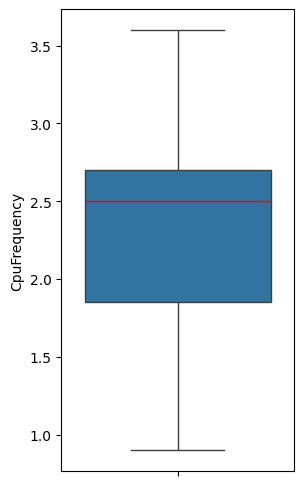

In [41]:



for i, col in enumerate(numeric_data.columns):
    plt.figure(figsize=(3, 6))
    #plt.subplot(10, 3, i + 1)
    sns.boxplot(y=df[col], medianprops={"color": "r", "linewidth": 1})
    plt.ylabel(col)
    Q1 =  df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(df[(df[col] < Q1-1.5*IQR ) | (df[col] > Q1+1.5*IQR)][col])
plt.show()

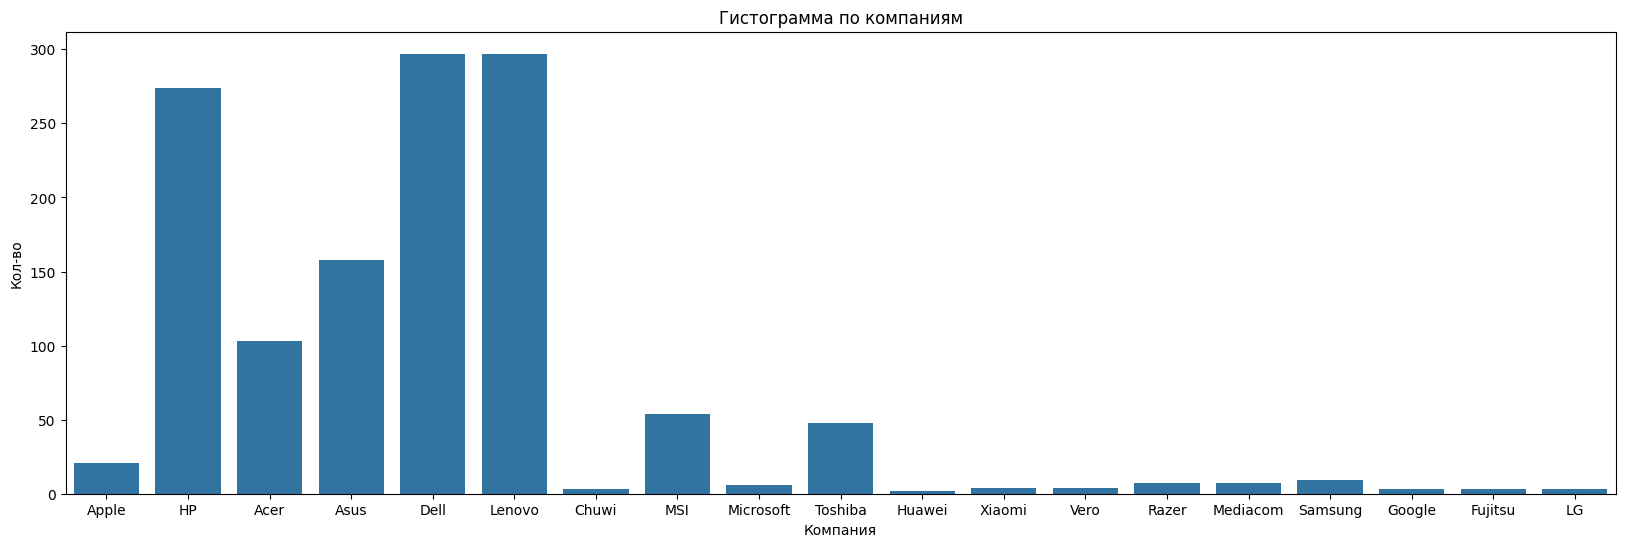

In [31]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Company', data=df)
plt.title('Гистограмма по компаниям')
plt.xlabel('Компания')
plt.ylabel('Кол-во')
plt.show()